MNIST Images: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
MNIST Lables: [5 0 4 ... 5 6 8]
Digit 0
Mnist Images 5923
Mnist Labels 5923
Digit 1
Mnist Images 6742
Mnist Labels 6742
Digit 2
Mnist Images 5958
Mnist Labels 5958
Digit 3
Mnist Images 6131
Mnist Labels 6131
Digit 4
Mnist Images 5842
Mnist Labels 5842
Digit 5
Mnist Images 5421
Mnist Labels 5421
Digit 6
Mnist Images 5918
Mnist Labels 5918
Digit 7
Mnist Images 6265
Mnist Labels 6265
Digit 8
Mnist Images 5851
Mnist Labels 5851
Digit 9
Mnist Images 5949
Mnist Labels 5949


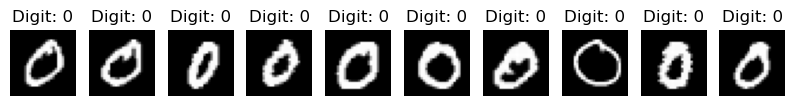

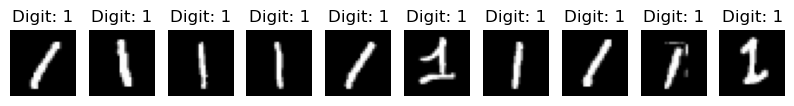

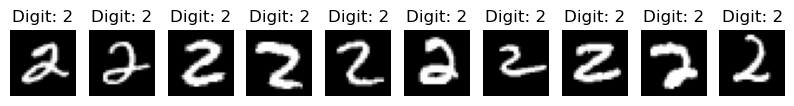

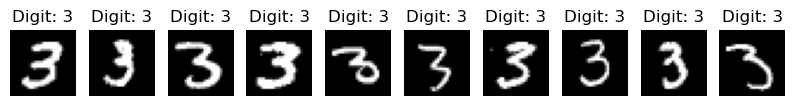

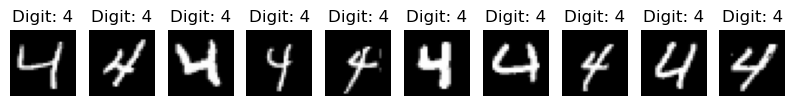

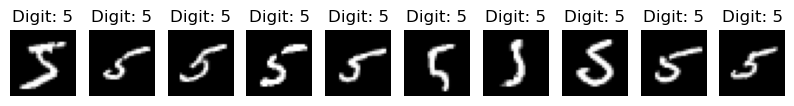

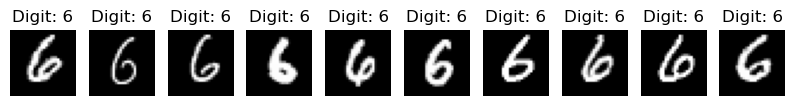

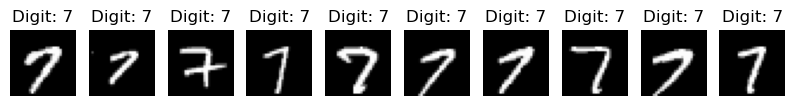

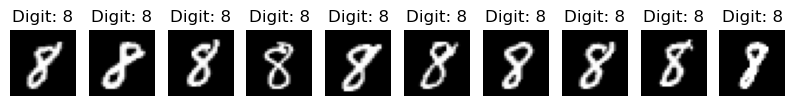

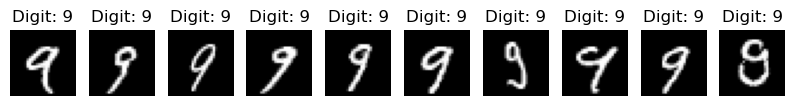

c:\Users\Akshay Patil\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


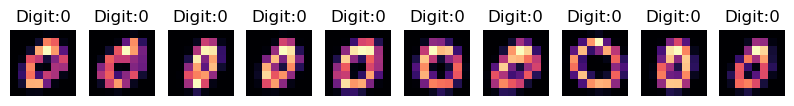

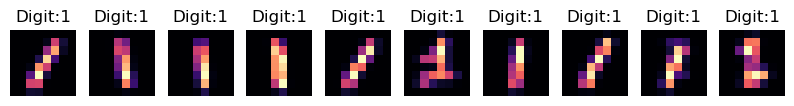

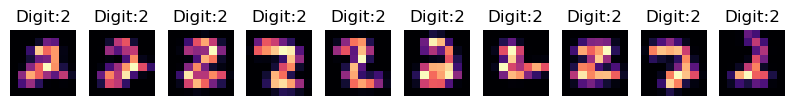

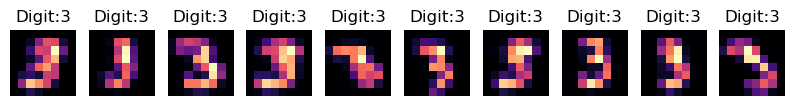

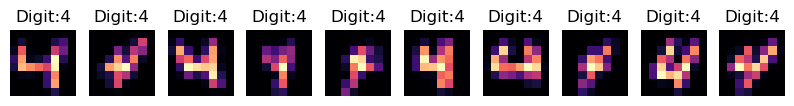

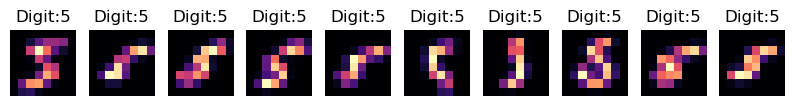

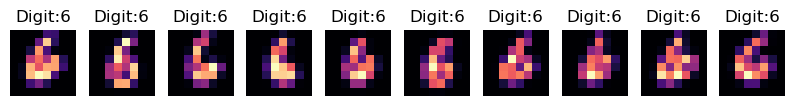

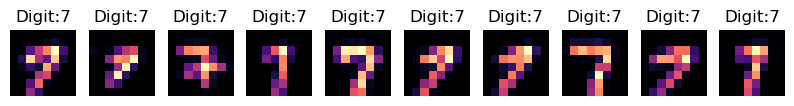

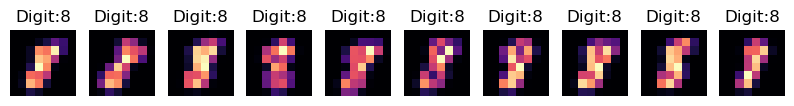

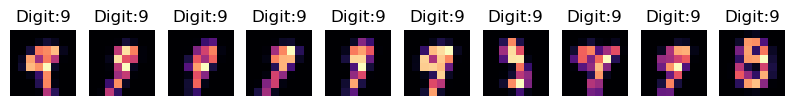

Digit zero [[0.00000000e+00 0.00000000e+00 5.02834929e-05 ... 5.04943733e-03
  2.54318312e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.64488586e-06 ... 2.44551014e-02
  2.39711887e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.95373525e-05 ... 5.52719367e-02
  4.29082453e-06 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.33822537e-04
  1.93436207e-08 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.30475596e-07 ... 1.49584173e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.45087318e-07 ... 5.72852573e-04
  3.43886591e-08 0.00000000e+00]]
Digit one [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.41505166e-07
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.26532695e-02 ... 2.13737652e+00
  3.00926886e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.68420508e-04 ... 4.41504330e-01
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00300256e-08
  0.0000000

In [1]:
# Quantum Amplitude Encoding

import idx2numpy
import numpy as np
import torch
from PIL import Image


def load_MNIST_dataset_Images(file_path): # for now trial on mnist dataset
    images = idx2numpy.convert_from_file(file_path)
    images = images.reshape(images.shape[0], -1)
    images = images.astype(np.float64)
    return images

def load_MNIST_dataset_Labels(file_path):
    labels = idx2numpy.convert_from_file(file_path)
    return labels

# Download the MNIST Dataset from Kaggle and Change this directory to your Directory
train_images_file = r"D:\Downloads Now\archive\train-images.idx3-ubyte"
train_labels_file = r"D:Downloads Now\archive\train-labels.idx1-ubyte"

mnist_images = load_MNIST_dataset_Images(train_images_file)
mnist_labels = load_MNIST_dataset_Labels(train_labels_file)

print('MNIST Images:', mnist_images)
print('MNIST Lables:', mnist_labels)


# Separating the load dataset into train labels and the train digits 

def separate_images_and_labels(images , labels , digit):
    digit_images = []
    digit_labels = []
    for image,label in zip(images,labels):
        if label == digit:
            digit_images.append(image)
            digit_labels.append(label)
    return digit_images,digit_labels

digits_to_separate = [0,1,2,3,4,5,6,7,8,9]

digit_image = {}
digit_label = {}

for digit in digits_to_separate:
    digit_image[digit], digit_label[digit] = separate_images_and_labels(mnist_images,mnist_labels,digit)

for digit in digits_to_separate:
    print('Digit', digit)
    print('Mnist Images', len(digit_image[digit]))
    print('Mnist Labels', len(digit_label[digit]))

import matplotlib.pyplot as plt

num_samples = 10 

for digit in digit_image.keys():
    sample_images = digit_image[digit][:num_samples]
    plt.figure(figsize = (10,2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(sample_images[i].reshape(28,28), cmap = 'gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')
    plt.show()

# Resize the image to a higher accuracy and match the dimensions of the qubits

from skimage.transform import resize

def resize_images(images, new_size = (8,8)):
    resized_images = []
    for image in images:
        resized_image = resize(image.reshape(28,28), new_size)
        resized_images.append(resized_image.flatten())
    return resized_images

new_size = (8,8)

resized_digit_images = {}
for digit in digit_image.keys():
    resized_digit_images[digit] = resize_images(digit_image[digit], new_size = new_size)

for digit in digit_image.keys():
    sample_images = resized_digit_images[digit][:num_samples]
    plt.figure(figsize =(10,2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(sample_images[i].reshape(new_size), cmap = 'magma')
        plt.title(f"Digit:{digit}")
        plt.axis('off')
    plt.show()

# Converting all the digits in to arrays

Digit_zero = []

for image in resized_digit_images[0]:
    Digit_zero_ = image
    Digit_zero.append(Digit_zero_)

Digit_zero = np.array(Digit_zero)

print('Digit zero',Digit_zero)

Digit_one = []

for image in resized_digit_images[1]:
    Digit_one_ = image
    Digit_one.append(Digit_one_)

Digit_one = np.array(Digit_one)

print('Digit one',Digit_one)

Digit_two = []

for image in resized_digit_images[2]:
    Digit_two_ = image
    Digit_two.append(Digit_two_)

Digit_two = np.array(Digit_two)

print('Digit two',Digit_two)

Digit_three = []

for image in resized_digit_images[3]:
    Digit_three_ = image
    Digit_three.append(Digit_three_)

Digit_three = np.array(Digit_three)

print('Digit three',Digit_three)

Digit_four = []

for image in resized_digit_images[4]:
    Digit_four_ = image
    Digit_four.append(Digit_four_)

Digit_four = np.array(Digit_four)

print('Digit four',Digit_four)

Digit_fifth = []

for image in resized_digit_images[5]:
    Digit_fifth_ = image
    Digit_fifth.append(Digit_fifth_)

Digit_fifth = np.array(Digit_fifth)

print('Digit fifth',Digit_fifth)

Digit_sixth = []

for image in resized_digit_images[6]:
    Digit_sixth_ = image
    Digit_sixth.append(Digit_sixth_)

Digit_sixth = np.array(Digit_sixth)

print('Digit Sixth',Digit_sixth)

Digit_seventh = []

for image in resized_digit_images[7]:
    Digit_seventh_ = image
    Digit_seventh.append(Digit_seventh_)

Digit_seventh = np.array(Digit_seventh)

print('Digit seventh',Digit_seventh)

Digit_eigth = []

for image in resized_digit_images[8]:
    Digit_eigth_ = image
    Digit_eigth.append(Digit_eigth_)

Digit_eigth = np.array(Digit_eigth)

print('Digit eigth',Digit_eigth)

Digit_nineth = []

for image in resized_digit_images[9]:
    Digit_nineth_ = image
    Digit_nineth.append(Digit_nineth_)

Digit_nineth = np.array(Digit_nineth)

print('Digit nineth',Digit_nineth)

# Digit zero to Nine grey scale matrix conversion by reshaping a row array into a (N,N) size

# Quantum Amplitude Encoding of MNIST Dataset

N = 8

Digit_zero_ = []

for i in range(len(Digit_zero)):
    Digit_zero_.append((Digit_zero[i].reshape(N**2))/np.linalg.norm(Digit_zero[i]))

Digit_one_ = []

for i in range(len(Digit_one)):
    Digit_one_.append((Digit_one[i].reshape(N**2))/np.linalg.norm(Digit_one[i]))

Digit_two_ = []

for i in range(len(Digit_two)):
    Digit_two_.append((Digit_two[i].reshape(N**2))/np.linalg.norm(Digit_two[i]))

Digit_three_ = []

for i in range(len(Digit_three)):
    Digit_three_.append((Digit_three[i].reshape(N**2))/np.linalg.norm(Digit_three[i]))

Digit_four_ = []

for i in range(len(Digit_four)):
    Digit_four_.append((Digit_four[i].reshape(N**2))/np.linalg.norm(Digit_four[i]))

Digit_five_ = []

for i in range(len(Digit_fifth)):
    Digit_five_.append((Digit_fifth[i].reshape(N**2))/np.linalg.norm(Digit_fifth[i]))

Digit_sixth_ = []

for i in range(len(Digit_sixth)):
    Digit_sixth_.append((Digit_sixth[i].reshape(N**2))/np.linalg.norm(Digit_sixth[i]))

Digit_seventh_ = []

for i in range(len(Digit_seventh)):
    Digit_seventh_.append((Digit_seventh[i].reshape(N**2))/np.linalg.norm(Digit_seventh[i]))

Digit_eigth_ = []

for i in range(len(Digit_eigth)):
    Digit_eigth_.append((Digit_eigth[i].reshape(N**2))/np.linalg.norm(Digit_eigth[i]))

Digit_nineth_ = []

for i in range(len(Digit_nineth)):
    Digit_nineth_.append((Digit_nineth[i].reshape(N**2))/np.linalg.norm(Digit_nineth[i]))


Input_state_vector_zero = np.array(Digit_zero_)
Input_state_vector_one = np.array(Digit_one_)
Input_state_vector_two = np.array(Digit_two_)
Input_state_vector_three = np.array(Digit_three_)
Input_state_vector_four = np.array(Digit_four_)
Input_state_vector_fifth = np.array(Digit_five_)
Input_state_vector_sixth = np.array(Digit_sixth_)
Input_state_vector_seventh = np.array(Digit_seventh_)
Input_state_vector_eigth = np.array(Digit_eigth_)
Input_state_vector_nineth = np.array(Digit_nineth_)

input_state_vectors = []

input_state_vectors.append(Input_state_vector_zero)
input_state_vectors.append(Input_state_vector_one)
input_state_vectors.append(Input_state_vector_two)
input_state_vectors.append(Input_state_vector_three)
input_state_vectors.append(Input_state_vector_four)
input_state_vectors.append(Input_state_vector_fifth)
input_state_vectors.append(Input_state_vector_sixth)
input_state_vectors.append(Input_state_vector_seventh)
input_state_vectors.append(Input_state_vector_eigth)
input_state_vectors.append(Input_state_vector_nineth)

input_state_vectors = np.concatenate(input_state_vectors,axis = 0)

labels = []
for i in range(10):
    labels.append(i)

print(labels)

labels_zero = [labels[0]]*Digit_zero.shape[0]
labels_one  = [labels[1]]*Digit_one.shape[0]
labels_two  = [labels[2]]*Digit_two.shape[0]
labels_three  = [labels[3]]*Digit_three.shape[0]
labels_four  = [labels[4]]*Digit_four.shape[0]
labels_five  = [labels[5]]*Digit_fifth.shape[0]
labels_six  = [labels[6]]*Digit_sixth.shape[0]
labels_seven  = [labels[7]]*Digit_seventh.shape[0]
labels_eigth  = [labels[8]]*Digit_eigth.shape[0]
labels_nineth  = [labels[9]]*Digit_nineth.shape[0]
labels_zero = np.array(labels_zero,dtype = int)
labels_one = np.array(labels_one,dtype = int)
labels_two = np.array(labels_two,dtype = int)
labels_three = np.array(labels_three,dtype = int)
labels_four = np.array(labels_four,dtype = int)
labels_five = np.array(labels_five,dtype = int)
labels_six = np.array(labels_six,dtype = int)
labels_seven = np.array(labels_seven,dtype = int)
labels_eigth = np.array(labels_eigth,dtype = int)
labels_nineth = np.array(labels_nineth,dtype = int)

labels_new_train = np.concatenate((labels_zero,labels_one))
labels_new_train = np.concatenate((labels_new_train,labels_two))
labels_new_train = np.concatenate((labels_new_train,labels_three))
labels_new_train = np.concatenate((labels_new_train,labels_four))
labels_new_train = np.concatenate((labels_new_train,labels_five))
labels_new_train = np.concatenate((labels_new_train,labels_six))
labels_new_train = np.concatenate((labels_new_train,labels_seven))
labels_new_train = np.concatenate((labels_new_train,labels_eigth))
labels_new_train = np.concatenate((labels_new_train,labels_nineth))


target_states_combined = np.zeros((60000, 64), dtype=np.float64)
target_states_combined[0:Digit_zero.shape[0], 0] = 1
target_states_combined[Digit_zero.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0], 7] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]:Digit_zero.shape[0] + Digit_one.shape[0]+Digit_two.shape[0], 14] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0], 21] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0], 28] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0], 35] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0], 42] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0], 49] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0], 56] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0]+Digit_nineth.shape[0], 63] = 1
target_states_combined = torch.tensor(target_states_combined, dtype=torch.float64)

# Test Dataset 

# Load MNIST test dataset
images = idx2numpy.convert_from_file(r"D:\Downloads Now\archive\\t10k-images.idx3-ubyte")# Download the MNIST Dataset from Kaggle and Change this directory to your Directory
labelss = idx2numpy.convert_from_file(r"D:\Downloads Now\archive\\t10k-labels.idx1-ubyte")

# Resize images to 32x32
images_resized = np.array([np.array(Image.fromarray(img).resize((8, 8))) for img in images])

# Normalize vectors
test_images = images_resized 

input_state_test_vectors = []


# Digit zero to Nine grey scale matrix conversion by reshaping a row array into a (N,N) size

N = 8


for i in range(len(images_resized)):
    input_state_test_vectors.append((images_resized[i].reshape(N**2,1))/np.linalg.norm(images_resized[i]))

input_state_test_vectors = np.array(input_state_test_vectors,dtype = np.float64)
input_state_test_vectors = torch.tensor(input_state_test_vectors,dtype = torch.float64)

In [2]:
# Quantum Circuit = Quantum Unitary by 1. Conjugate Gradient Methods for finding the Unitary Matrix of Seperation ...
# 2. Singular Value Decomposition (S.V.D)
# 3. QR Decomposition 
# 4. Exponential Hamiltonian Method

In [ ]:
# 1. Conjugate Gradient Methods for finding the Unitary Matrix of Seperation ...


import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import scipy.linalg as la
import pennylane as qml

input_state_vectors = np.array(input_state_vectors, dtype=np.float64)
input_vectors = torch.tensor(input_state_vectors, dtype=torch.float64)


target_states_combined = np.zeros((60000, 64), dtype=np.float64)
target_states_combined[0:Digit_zero.shape[0], 0] = 1
target_states_combined[Digit_zero.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0], 7] =  1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]:Digit_zero.shape[0] + Digit_one.shape[0]+Digit_two.shape[0], 14] =  1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0], 21] =  1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0], 28] =  1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0], 35] =  1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0], 42] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0], 49] =  1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0], 56] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0]+Digit_nineth.shape[0], 63] =  1 
target_states_combined = torch.tensor(target_states_combined, dtype=torch.float64)


target_states_combined = torch.tensor(target_states_combined, dtype=torch.float64)
labels_train = torch.tensor(labels_new_train , dtype = torch.long)
labels_test = torch.tensor(labelss , dtype = torch.long)
input_state_test_vectors = torch.tensor(input_state_test_vectors,dtype = torch.float64)


# Define the Machine Learning By Conjugate Gradients Model
class UnitaryMatrixModel(nn.Module):
    def __init__(self):
        super().__init__()
        # self.fc = nn.Linear(32, 32, bias=False,dtype = torch.float64) # for Unitary Block Encoding Method
        self.fc = nn.Linear(64, 64, bias=False,dtype = torch.float64)

    # def make_unitary(self, matrix):
    #     Q, R = torch.linalg.qr(matrix)
    #     return Q
    def make_unitary(self,matrix):
        q, r = torch.linalg.qr(matrix)
        ph   = torch.sign(torch.diag(r))
        return q * ph
    # def make_unitary(self,matrix):
    #     # matrix = matrix.detach().numpy()
    #     u, s,v = torch.linalg.svd(matrix)
    #     unitary = u@v
    #     return unitary
    # def make_unitary(self,matrix):
    #     matrix = (matrix + matrix.conj().T)/2
    #     s = torch.matrix_exp((-1j)*matrix)
    #     return s
    # def make_non_unitary(self,matrix): # Nonunitary Matrices
    #     return matrix
    # def make_unitary(self,matrix):
    #     # Requires 32,32 Linear Layer Matrix , which can be block encoded to create 64 x 64 matrix...
    #     num_qubits = 6
    #     dev = qml.device('default.qubit', wires = num_qubits)
    #     op = qml.BlockEncode(matrix, wires = range(num_qubits))
    #     unitary = qml.matrix(op)
    #     return unitary
    
    def forward(self, x):
        # U = self.make_unitary(self.fc.weight)
        U = self.make_unitary(self.fc.weight)
        # U = self.fc.weight # for orthonormality constraint
        x = U@x.reshape(-1,64,1)
        x = x.reshape(-1,64)
        return x,U

# Finding the Accuracy of the Classification from the Quantum State Vector prior to Measurement , but also can be extended 
# to after measurement , from the resultant state that occurs most number of times and comparing the index position of that 
# with respect to the set target state vectors probability amplitudes , ex - if most number of times the state after measurement 
# is |64> i.e. |Binary form of 64> , then the class of the input vector predicted by this basic quantum model is class 1 ...

# Output Vectors before Quantum Measurement by ML Method

def evaluate_model(model , labels_train , labels_test):
    model.eval()
    with torch.no_grad():
        output_train,U = model(input_state_vectors)
        output_test,U = model(input_state_test_vectors)
        pred_classes_train = torch.argmax(output_train,dim=1)//7 # as 7 is the class element spacing of the extended one hot label encoding of target vectors
        pred_classes_test = torch.argmax(output_test,dim=1)//7
        Train_accuracy = torch.sum(pred_classes_train == labels_train)/60000
        Test_accuracy = torch.sum(pred_classes_test == labels_test)/10000
        return Train_accuracy*100 , Test_accuracy*100

# Since this is Quantum Inspired Approach No Need of Quantum Measurement but one can try Quantum Measurement by Indexing Without Using Qiskit but directly using 
# numpy or pytorch or Tensorflow or Scipy using Indexing Approach.


# Custom loss function combining RMSE and orthonormality
def combined_loss(output, target,M):
    rmse_loss_between_probabilities = nn.CrossEntropyLoss()(output, target) # MSE between the Output and the Target Probabilities Reduction
    # This can be changed with other Loss functions as 
    # well as Locally Weighted Linear Regression to fit the Nonlinear Dataset can be used (Degree of Dataset not equal to 1.)
    # Orthonormality loss
    gram_matrix_0 = torch.mm(M.conj().T, M)  # Compute Gram matrix
    identity_0 = torch.eye(M.shape[1]).to(M.device)  # Identity matrix for columns
    ortho_loss_0 = torch.norm(gram_matrix_0 - identity_0)  # Frobenius norm of the difference
    gram_matrix_1 = torch.mm(M, M.conj().T)  # Compute Gram matrix
    identity_1 = torch.eye(M.shape[1]).to(M.device)  # Identity matrix for columns
    ortho_loss_1 = torch.norm(gram_matrix_1 - identity_1)  # Frobenius norm of the difference

    return rmse_loss_between_probabilities,ortho_loss_0 ,ortho_loss_1  #rmse_loss_between_probabilities + ortho_loss_0 + ortho_loss_1 , ortho_loss_0 ,ortho_loss_1 # One can also give the Orthonormality constraints in the optimization 
#equation to create the unitary (orthonormal) matrix ...


# Initialize model, optimizer, and data
model = UnitaryMatrixModel()
optimizer = optim.RMSprop(model.parameters(), lr=1e-3) # Experiment with learing rate for different methods and also different Optimizer

scheduler   = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, patience=5, factor=0.5 , verbose = True
)


train_dataset = TensorDataset(torch.tensor(input_state_vectors, dtype=torch.float64),
                             torch.tensor(target_states_combined, dtype=torch.float64))


train_loader = DataLoader(train_dataset, batch_size=1000, shuffle=True, num_workers=0)

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    for a,b in train_loader:
        optimizer.zero_grad()  # Clear gradients
        output,U = model(a)     
        loss , rightortho , leftortho = combined_loss(output, b, U)  # Calculate combined loss
        loss.backward()         # Backpropagation
        optimizer.step()        # Update weights
    scheduler.step(loss/len(train_loader))
    train_accuracy,test_accuracy = evaluate_model(model,labels_train , labels_test)
    if epoch % 1 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item()/len(train_loader):.4e}, Train Accuracy: {train_accuracy:.5f} %, Test Accuracy: {test_accuracy:.5f} % , Right Unitary Loss:{rightortho:.7e}, Left Unitary Loss:{leftortho:.7e}')

C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_6848\3522300090.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_states_combined = torch.tensor(target_states_combined, dtype=torch.float64)
C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_6848\3522300090.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_state_test_vectors = torch.tensor(input_state_test_vectors,dtype = torch.float64)
c:\Users\Akshay Patil\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_6848\3522300090.py:126: UserWar

Epoch [0/300], Loss: 6.1164e-02, Train Accuracy: 70.23167 %, Test Accuracy: 72.67000 % , Right Unitary Loss:4.9418530e-15, Left Unitary Loss:5.2268109e-15
Epoch [1/300], Loss: 6.1065e-02, Train Accuracy: 73.07166 %, Test Accuracy: 75.01000 % , Right Unitary Loss:5.5669489e-15, Left Unitary Loss:5.4861482e-15
Epoch [2/300], Loss: 6.1099e-02, Train Accuracy: 73.35500 %, Test Accuracy: 75.51000 % , Right Unitary Loss:5.2666767e-15, Left Unitary Loss:5.1698963e-15
Epoch [3/300], Loss: 6.0960e-02, Train Accuracy: 73.43166 %, Test Accuracy: 75.54000 % , Right Unitary Loss:5.5722679e-15, Left Unitary Loss:5.9205204e-15
Epoch [4/300], Loss: 6.1174e-02, Train Accuracy: 75.15833 %, Test Accuracy: 77.10001 % , Right Unitary Loss:5.5202299e-15, Left Unitary Loss:5.3403749e-15
Epoch [5/300], Loss: 6.0972e-02, Train Accuracy: 74.25667 %, Test Accuracy: 76.22000 % , Right Unitary Loss:5.1252913e-15, Left Unitary Loss:5.2480472e-15
Epoch [6/300], Loss: 6.0949e-02, Train Accuracy: 74.87833 %, Test Accu

In [ ]:
np.save(r"C:\Users\Akshay Patil\Desktop\Unitary_Batches_Mapping_Input_Data_Train_\UnitaryFinalClassifierOrthonormalityConstraint.npy",U.detach().numpy())

In [ ]:

# Quantum Amplitude Encoding

# Base Single Unitary Quantum Circuits for Classification in Amplitude Encoding...

# Input Image Dimension of Classical Data - 8 x 8 -> 64 dimensional to save the compute power...


# Results - Train Accuracy | Test Accuracy | Average Circuit Depth of Amplitude Encoded Input Vectors and Quantum Circuit by Quantum Shanon Decomposition Per Input Data Point by SVD for Input Mapping (d_svd)
#  | Average Total Gates Per Input Data Point by SVD for Input Mapping (g_svd) | d_gradients | g_gradients | d_qr | g_qr | d_qr_diag | g_qr_diag | d_unitary_encoding | g_unitary_encoding | d_exp | g_exp | 

# Different Initialization , different learning rates and small different relaxation in unitary can give subtle increase in convergence accuracy but not above the non-unitary threshold...
# A.Real Unitary Real INput Real Target By Conjugate Gradients Methods - #1. Make Unitary by QR - 58.62%|60.1600%|3500|3840| - Rough Training - Accuracy irrespective of Loss increase and decrease
                                            #1. Make Unitary by QR Stabilized - 74 %|77 %|3500|3840|3500|3840||||||| - Stabilized
                                           #2. Make Unitary by SVD - 74%| 77%|3500|3840|
                                           #3. Make Unitary by Orthonormal Loss Function - 71.75%| 73.97%|3500|3840|
                                           #4. Make Unitary by Exponential of Hermitian Tranable Hamiltonian of the Quantum Circuit of Classification - %| %| | | - Works only for complex Unitaries which requires complex input and output , will upload it later along with all other possible encodings and architechtures!!!
                                           #5. Make Unitary by Unitary Encoding- 10.4333%| 9.86%|3500|3840|  - Random Accuracy - Here the target vectors can be changed to just top 32 elements of the 64 x 1 vectors as only those are trainable , and other ways can also be thought out to increase the accuracy
                                           #6. Make Non-Unitary - 87.30%| 88.73%|-|-| (without Bias conventional Linear Regression)
                                           # The Average Depth Remain Same for all methods as the decomposition Method of Unitary of Mapping and Unitary of
                                           # of classification always use SVD ,still there should be difference as the matrix method change so elements changes
                                           # of classification, so one can use other methods there for decomposition (one of the above to see if circuit depth minimizes or remain same)
                                           # if they remain same , then one can say experimentally that only the size of the unitary matrix and precision of the unitary decides the optimum depth and number of gates
                                           # irrespective of elements which is governed by the underlying method used for finding unitary - "It remains the same" ...
# B.Real Unitary Real INput Real Target Unitary By Direct SVD - %| %| | |
# C.Real Unitary Real INput Real Target Unitary By QR Decomposition - %| %| | |
# D.Real Unitary Real INput Real Target Unitary By Exponential of Hermitian Trainable Hamiltonian of the Quantum Circuit of Classification - %| %| | |
# E.Real Unitary Real INput Real Target Unitary By Unitary Encoding - %| %| | |
# F.Real Unitary Real INput Real Target Unitary By Non Unitary (Open Quantum System) - %| %| | |

# Note - We are not putting in restriction of connectivity of CNOT's available on Present Quantum Computers 
# If connectivity restirictions are imposed the Number of Gates can increase to approximate the same unitary  , also the Fildelity of the 
# circuit to approximate the given unitaries can also be low , but here with QS Decompostion We have perfect Fildelity upto 10e-15

# Note - Use of Standard Scaler and Minimax Scaler as Preprocessing Step can increase the Accuracy , also to save the compute we have taken only 8,8
# images  , 32,32 can achieve a highest upto 80 Percent on test , since we this is base quantum inspired ML algorithm only quantum linear unitary
# constriant linear classification is possible without bias...We will add on more advanced methods on this later...

In [ ]:
# Input Data Mapping on a Quantum Computer...

import os
import numpy as np
from numpy.linalg import svd,qr
from pathlib import Path


USER_OUT_DIR = Path(r"C:\Users\Akshay Patil\Desktop\Unitary_Batches_Mapping_Input_Data_Train_QR")  # Output directory
BATCH_SIZE = 10 

os.makedirs(USER_OUT_DIR, exist_ok=True)


def input_mapping_unitary(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    #find unitary U such that x @ U ≈ y # One can experiment here by using various Methods of Unitary mapping used above
    #Conjugate Methods can also be used here to find the unitary of mapping from input qubit ground state to inputstatevectors 
    C = x.T @ y
    U, _, Vt = svd(C)
    return U @ Vt

# def input_mapping_unitary(x: np.ndarray, y: np.ndarray) -> np.ndarray:
#     C = x.T @ y
#     Q, R = qr(C)
#     return Q # Does not map and causes RMSE error to be high and hence either SVD or Gradient method is more suited for unitary of mapping finding per ground-input_quantum_encoded_state
# def input_mapping_unitary(x: np.ndarray, y: np.ndarray) -> np.ndarray:
#     C = x.T @ y
#     q, r = qr(C)
#     ph   = np.sign(np.diag(r))
#     return q * ph # Does not map and causes RMSE error to be high and hence either SVD or Gradient method is more suited for unitary of mapping finding per ground-input_quantum_encoded_state


# def input_mapping_unitary(x: np.ndarray, y: np.ndarray) -> np.ndarray:
#         # Requires 32,32 Linear Layer Matrix , which can be block encoded to create 64 x 64 matrix...
#     matrix = x.T @ y
#     num_qubits = 6
#     dev = qml.device('default.qubit', wires = num_qubits)
#     op = qml.BlockEncode(matrix, wires = range(num_qubits))
#     unitary = qml.matrix(op)
#     return unitary # Cannot be used due to dimension mismatch as unitary encoding by definition requires 1 extra qubit and the matrix is already 64x64


def fro_error(U: np.ndarray) -> float:
    # ||UU^T - I||_F
    return np.linalg.norm(U @ U.conj().T - np.eye(U.shape[0]), "fro")

def mapping_loss(x: np.ndarray, y: np.ndarray, U: np.ndarray) -> float:
    # RMSE between y and x @ U
    pred = x @ U
    return np.sqrt(((y - pred) ** 2).mean())

def save_and_delete(arr: np.ndarray, path: Path):
    np.save(path, arr)
    del arr

Inputgroundqubitstate = np.zeros((60000,64),dtype = np.complex128)
Inputgroundqubitstate[:,0] = 1  
train_inputs = np.array(input_state_vectors,dtype = np.complex128)
n_samples = 100


for start in range(0, n_samples, BATCH_SIZE):
    end = min(start + BATCH_SIZE, n_samples)
    y_batch = input_state_vectors[0:100] # only 100 I/P's for mapping
    x_batch = train_inputs[0:100] # only 100 O/P's for mapping
    for i in range(x_batch.shape[0]):
        x = x_batch[i].reshape(1, -1)  # (1, 1024)
        y = y_batch[i].reshape(1, -1)  # (1, 1024)
        U = input_mapping_unitary(x, y)
        unitary_err = fro_error(U)
        loss = mapping_loss(x, y, U)
        print(f"Pair {start + i:06d}: Unitarity error = {unitary_err:.2e}, Mapping RMSE = {loss:.20f}")
        out_path = USER_OUT_DIR / f"unitary_{start + i:06d}.npy"
        save_and_delete(U, out_path)
    del x_batch, y_batch

print("All unitary matrices saved batchwise in:", USER_OUT_DIR)


Pair 000000: Unitarity error = 8.85e-15, Mapping RMSE = 0.00000000000000005187+0.00000000000000000000j
Pair 000001: Unitarity error = 8.30e-15, Mapping RMSE = 0.00000000000000007003+0.00000000000000000000j
Pair 000002: Unitarity error = 8.55e-15, Mapping RMSE = 0.00000000000000005032+0.00000000000000000000j
Pair 000003: Unitarity error = 8.27e-15, Mapping RMSE = 0.00000000000000005310+0.00000000000000000000j
Pair 000004: Unitarity error = 8.16e-15, Mapping RMSE = 0.00000000000000005500+0.00000000000000000000j
Pair 000005: Unitarity error = 8.41e-15, Mapping RMSE = 0.00000000000000005271+0.00000000000000000000j
Pair 000006: Unitarity error = 8.22e-15, Mapping RMSE = 0.00000000000000005872+0.00000000000000000000j
Pair 000007: Unitarity error = 8.88e-15, Mapping RMSE = 0.00000000000000005438+0.00000000000000000000j
Pair 000008: Unitarity error = 8.22e-15, Mapping RMSE = 0.00000000000000006564+0.00000000000000000000j
Pair 000009: Unitarity error = 8.63e-15, Mapping RMSE = 0.000000000000000

In [ ]:
# Input Data Mapping on Quantum Computer by Conjugate Gradients -

import os
from pathlib import Path
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

USER_OUT_DIR = Path(r"C:\Users\Akshay Patil\Desktop\Unitary_Batches_Mapping_Input_Data_Train_Conjugate_Gradients")
USER_OUT_DIR.mkdir(parents=True, exist_ok=True)

BATCH_SIZE       = 1000      
MAX_ITERS        = 500    
LR               = 1e-2   
FEATURE_DIM      = 64    

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def save_unitary(U: np.ndarray, idx: int):
    np.save(USER_OUT_DIR / f"unitary_{idx:06d}.npy", U)
    print(f"Saved unitary_{idx:06d}.npy")


class UnitaryModel(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.A = nn.Parameter(torch.randn(dim, dim, dtype=torch.float64, device=device))

    def forward(self):
        # project A → U via QR + sign correction
        Q, R = torch.linalg.qr(self.A)
        diag = torch.sign(torch.diag(R))
        U = Q @ torch.diag(diag)
        return U

def train():
    X = torch.zeros(50000,64,dtype=torch.float64)
    X[:,0] = 1
    Y = torch.tensor(input_state_vectors,dtype=torch.float64)
    N = X.size(0)
    mse = nn.MSELoss()
    X = X[:10]
    Y = Y[:10]
    global_idx = 0
    for start in range(0, N, BATCH_SIZE):
        end = min(start + BATCH_SIZE, N)
        Xb, Yb, Lb = X[start:end], Y[start:end], labels[start:end]

        for local_j in range(Xb.size(0)):
            idx = start + local_j
            x_i = Xb[local_j:local_j+1]         
            y_i = Yb[local_j:local_j+1]           

            model = UnitaryModel(FEATURE_DIM).to(device)
            optim_ = optim.Adam(model.parameters(), lr=LR)

            for it in range(MAX_ITERS):
                optim_.zero_grad()
                U = model()                    
                pred_i = (U @ x_i.reshape(-1,64,1))      
                loss_rec = mse(pred_i.reshape(-1,64), y_i)
                loss = loss_rec 
                loss.backward()
                optim_.step()
                print('Iterations', it , 'loss',loss)
            # finalize
            with torch.no_grad():
                U_final = model().cpu().numpy()
                err = np.linalg.norm(U_final @ U_final.conj().T - np.eye(FEATURE_DIM))
                print(f"#{global_idx:06d}: rec={loss_rec.item():.4e}, unit_err={err:.4e}")

                save_unitary(U_final, global_idx)
                global_idx += 1

    print("Done. Saved all unitaries to:", USER_OUT_DIR)

if __name__ == "__main__":
    train()


Iterations 0 loss tensor(0.0300, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Iterations 1 loss tensor(0.0298, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Iterations 2 loss tensor(0.0296, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Iterations 3 loss tensor(0.0294, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Iterations 4 loss tensor(0.0292, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Iterations 5 loss tensor(0.0290, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Iterations 6 loss tensor(0.0288, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Iterations 7 loss tensor(0.0286, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Iterations 8 loss tensor(0.0284, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Iterations 9 loss tensor(0.0282, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Iterations 10 loss tensor(0.0280, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Iterations 11 loss tensor(0.0278, dtype=torch.float64, grad_fn=<MseLossBackward0>)
Iterations 12 

In [ ]:
# Quantum Computing Circuit for Quantum Computer Hardware Implementation of the above basic algorithm
import numpy as np
import os
import glob
import time
from datetime import datetime
from pathlib import Path
from qiskit import QuantumCircuit, qpy
from qiskit.quantum_info import Operator
from qiskit.synthesis import qs_decomposition, OneQubitEulerDecomposer, TwoQubitBasisDecomposer
from qiskit.circuit.library import CXGate

MAPPING_DIR = Path(r"C:\Users\Akshay Patil\Desktop\Unitary_Batches_Mapping_Input_Data_Train_Conjugate_Gradients")
CLASSIFIER_PATH = r"C:\Users\Akshay Patil\Desktop\Unitary_Batches_Mapping_Input_Data_Train_\UnitaryFinalClassifierQR.npy"
OUTPUT_DIR = r"C:\Users\Akshay Patil\Desktop\Unitary_Batches_Mapping_Input_Data_Train_ComposedQR"
BATCH_SIZE = 100


def get_sorted_npy_files(directory):
    files = glob.glob(os.path.join(directory, "unitary_*.npy"))
    files.sort()
    return files

def load_classifier_matrix(path):
    matrix = np.load(path)
    if matrix.shape != (64, 64):
        raise ValueError(f"Classifier matrix must be 64x64, got {matrix.shape}")
    return matrix

def verify_unitary(matrix, tol=1e-14):
    return np.allclose(matrix @ matrix.conj().T, np.eye(64), atol=tol)

def compose_and_decompose(mapping_matrix, classifier_matrix):
    # Compose: U(Mapping_i) → U(Classifier)
    composed = mapping_matrix @ classifier_matrix
    if not verify_unitary(composed):
        # SVD normalization for numerical stability
        u, _, vh = np.linalg.svd(composed)
        composed = u @ vh
    # QS decomposition
    oneq = OneQubitEulerDecomposer(basis='U3')
    twoq = TwoQubitBasisDecomposer(CXGate())
    circuit = qs_decomposition(
        composed,
        opt_a1=True,
        opt_a2=True,
        decomposer_1q=oneq,
        decomposer_2q=twoq
    )
    return circuit



def save_qs_decomposed_circuit(circuits, output_path,batch_idx):
    """Save the QS decomposed circuit to file."""
    print("\n" + "=" * 70)
    print("SAVING QS DECOMPOSED CIRCUIT")
    print("=" * 70)
    try:
        # Create directory if it doesn't exist
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        
        with open(output_path, 'w') as f:
            # Write header
            f.write("=" * 80 + "\n")
            f.write("QUANTUM CIRCUIT DECOMPOSITION USING QS (QUANTUM SHANNON) DECOMPOSITION\n")
            f.write("=" * 80 + "\n")
            f.write(f"Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write("Method: Quantum Shannon Decomposition with optimizations\n")
            f.write("=" * 80 + "\n\n")

            for circuit in circuits:
                # Write circuit information
                f.write("QS DECOMPOSED CIRCUIT INFORMATION:\n")
                f.write("-" * 40 + "\n")
                f.write(f"Circuit name: {circuit.name}\n")
                f.write(f"Number of qubits: {circuit.num_qubits}\n")
                f.write(f"Total gates: {circuit.size()}\n")
                f.write(f"Circuit depth: {circuit.depth()}\n\n")
                
                # Write gate counts
                gate_counts = {}
                for instruction in circuit.data:
                    gate_name = instruction.operation.name
                    gate_counts[gate_name] = gate_counts.get(gate_name, 0) + 1
                
                f.write("GATE COUNTS:\n")
                f.write("-" * 40 + "\n")
                for gate, count in sorted(gate_counts.items()):
                    f.write(f"{gate}: {count}\n")
                f.write("\n")
                
                # Write circuit diagram (limited for readability)
                f.write("CIRCUIT DIAGRAM (first 20 lines):\n")
                f.write("-" * 40 + "\n")
                circuit_str = str(circuit.draw(output='text', fold=100))
                lines = circuit_str.split('\n')
                for line in lines[:20]:
                    f.write(line + "\n")
                if len(lines) > 20:
                    f.write(f"... and {len(lines) - 20} more lines\n")
                f.write("\n")
                
                # Write detailed gate sequence (limited to first 100 gates for readability)
                f.write("DETAILED GATE SEQUENCE (First 100 gates):\n")
                f.write("-" * 40 + "\n")
                for i, instruction in enumerate(circuit.data[:100]):
                    gate = instruction.operation
                    qubits = [circuit.find_bit(q)[0] for q in instruction.qubits]
                    
                    if hasattr(gate, 'params') and gate.params:
                        params_str = f"({', '.join(f'{p:.6f}' for p in gate.params)})"
                    else:
                        params_str = ""
                    
                    f.write(f"{i+1:4d}: {gate.name}{params_str} on qubits {qubits}\n")
                
                if len(circuit.data) > 100:
                    f.write(f"... and {len(circuit.data) - 100} more gates\n")
                
                f.write("\n" + "=" * 80 + "\n")
                f.write("QS DECOMPOSITION COMPLETED SUCCESSFULLY\n")
                f.write("=" * 80 + "\n")
            
        print(f"QS decomposed circuit successfully saved to: {output_path}")
        print(f"File size: {os.path.getsize(output_path)} bytes")
        
    except Exception as e:
        print(f"ERROR saving circuit: {e}")


def process_batch(mapping_files,classifier_matrix, batch_start, batch_end, output_dir):
    circuits = []
    for i in range(batch_start,batch_end): 
        mapping_matrix = np.load(mapping_files[i])
        circuit = compose_and_decompose(mapping_matrix, classifier_matrix)
        circuit.name = f"circuit_{i:05d}"
        circuits.append(circuit)
    # output_path = output_dir  + f"circuits_batch_{batch_start // BATCH_SIZE:05d}.txt"
    output_path = output_dir  + f"\circuits_first_10_Quantum_Circuits.txt"
    save_qs_decomposed_circuit(circuits, output_path,batch_start // BATCH_SIZE)
    print(f"Saved batch {batch_start // BATCH_SIZE} ({batch_start}-{batch_end-1}) with {len(circuits)} circuits.")

def main():
    mapping_files = get_sorted_npy_files(MAPPING_DIR)
    classifier_matrix = load_classifier_matrix(CLASSIFIER_PATH)
    total_circuits = len(mapping_files)
    print(f"Total circuits to process: {total_circuits}")

    start_time = time.time()
    # for batch_start in range(0, total_circuits, BATCH_SIZE):
    #     batch_end = min(batch_start + BATCH_SIZE, total_circuits)
    process_batch(mapping_files, classifier_matrix, 0, 10, OUTPUT_DIR)
    elapsed = time.time() - start_time
    print(f"All {total_circuits} circuits processed and saved in {elapsed:.2f} seconds.")

if __name__ == "__main__":
    main()

Total circuits to process: 10

SAVING QS DECOMPOSED CIRCUIT
QS decomposed circuit successfully saved to: C:\Users\Akshay Patil\Desktop\Unitary_Batches_Mapping_Input_Data_Train_ComposedQR\circuits_first_10_Quantum_Circuits.txt
File size: 134009 bytes
Saved batch 0 (0-9) with 10 circuits.
All 10 circuits processed and saved in 75.53 seconds.
